# CNN Architecture

In [ ]:
# Q1. What is a Convolutional Neural Network (CNN), and why is it used for image processing?

# answer
# A Convolutional Neural Network (CNN) is a deep learning model specialized for grid-like data such as images.
# It uses convolutional layers to automatically learn spatial hierarchies of features (edges→textures→parts→objects).
# CNNs are used for image processing because weight sharing and local connectivity drastically reduce parameters,
# improve translation invariance, and capture local-to-global patterns efficiently.

In [ ]:
# Q2. What are the key components of a CNN architecture?

# answer
# Typical components are:
# - Input tensor (e.g., H×W×C image)
# - Convolutional layers (kernels + bias)
# - Nonlinear activations (ReLU, GELU, etc.)
# - Pooling layers (max/avg) for downsampling
# - Normalization (Batch/Layer Norm)
# - Skip/Residual connections (in modern nets)
# - Fully connected (dense) or global pooling head
# - Softmax/sigmoid output for classification

In [ ]:
# Q3. What is the role of the convolutional layer in CNNs?

# answer
# The convolutional layer performs learnable convolutions over the input with small kernels.
# It extracts local features by sliding filters across spatial dimensions, producing feature maps.
# This encodes translation-equivariant, local pattern detectors while sharing weights across positions.

In [ ]:
# Q4. What is a filter (kernel) in CNNs?

# answer
# A filter (kernel) is a small learnable matrix (e.g., 3×3×C) applied via convolution to detect a specific pattern
# (e.g., edge, texture). Multiple filters produce multiple feature maps; deeper layers learn higher-level patterns.

In [ ]:
# Q5. What is pooling in CNNs, and why is it important?

# answer
# Pooling reduces spatial resolution by aggregating features within neighborhoods.
# It lowers computation/memory, increases receptive field, and provides translational invariance and robustness to small shifts/noise.

In [ ]:
# Q6. What are the common types of pooling used in CNNs?

# answer
# Most common:
# - Max Pooling: takes the maximum value in each window (captures strongest activation)
# - Average Pooling: averages values in each window (smooths/retains overall presence)
# - Global Average Pooling: averages spatially across the entire feature map (used before classification head).

In [ ]:
# Q7. How does the backpropagation algorithm work in CNNs?

# answer
# Backpropagation in CNNs computes gradients of the loss w.r.t. all parameters using the chain rule:
# 1) Forward pass computes activations (convs, activations, pooling).
# 2) Backward pass propagates gradients through layers, including:
#    - Convolution: compute dL/dW by convolving input with upstream gradients; dL/dX by convolving flipped filters with upstream gradients.
#    - Activation: multiply by derivative (e.g., ReLU' = 1 for x>0 else 0).
#    - Pooling: route gradients to positions that contributed (e.g., argmax for max pooling).
# 3) Optimizer updates weights using gradients.

In [ ]:
# Q8. What is the role of activation functions in CNNs?

# answer
# Activations introduce non-linearity enabling CNNs to model complex functions.
# Choices like ReLU mitigate vanishing gradients and speed up training; others (LeakyReLU, ELU, GELU) can improve gradient flow and accuracy.

In [ ]:
# Q9. What is the concept of receptive fields in CNNs?

# answer
# The receptive field of a neuron is the spatial region of the input that can influence that neuron’s activation.
# Stacking conv/pool layers grows the effective receptive field, enabling neurons to respond to larger, more global patterns.

In [ ]:
# Q10. Explain the concept of tensor space in CNNs?

# answer
# In CNNs, tensors represent data/parameters with dimensions (N, H, W, C) or (N, C, H, W).
# Tensor space refers to the high-dimensional space where operations (conv, reshape, permute, matmul) transform these tensors.
# Understanding shapes, strides, and layout is crucial for building efficient CNNs.

In [ ]:
# Q11. What is LeNet-5, and how does it contribute to the development of CNNs?

# answer
# LeNet-5 (Yann LeCun et al., 1998) is an early CNN for digit recognition (MNIST).
# Architecture: conv→pool→conv→pool→FC→softmax (tanh/avg-pool originally). It demonstrated end-to-end learning with gradient descent,
# laying foundations for modern CNNs.

In [ ]:
# Q12. What is AlexNet, and why was it a breakthrough in deep learning?

# answer
# AlexNet (Krizhevsky et al., 2012) won ImageNet LSVRC-2012 by a large margin.
# Key ideas: deep ReLU-based CNN, local response normalization, dropout, data augmentation, and GPU training.
# It sparked the deep learning revolution in computer vision.

In [ ]:
# Q13. What is VGGNet, and how does it differ from AlexNet?

# answer
# VGGNet (Simonyan & Zisserman, 2014) used very deep stacks of 3×3 convs and 2×2 pools with simple, uniform design (VGG-16/19).
# Compared to AlexNet’s larger kernels, VGG’s small kernels increased depth, receptive field via stacking, and improved accuracy at the cost of more parameters.

In [ ]:
# Q14. What is GoogLeNet, and what is its main innovation?

# answer
# GoogLeNet (Inception-v1, 2014) introduced the Inception module: parallel paths with 1×1, 3×3, 5×5 convs + pooling, then concatenation.
# It improved computational efficiency with 1×1 bottlenecks and multi-scale feature extraction, achieving state-of-the-art with fewer parameters.

In [ ]:
# Q15. What is ResNet, and what problem does it solve?

# answer
# ResNet (He et al., 2015) introduced residual (skip) connections: y = F(x) + x.
# Residual learning eases optimization of very deep networks by enabling gradient flow through identity shortcuts, solving vanishing-gradient issues and allowing >100 layers.

In [ ]:
# Q16. What is DenseNet, and how does it differ from ResNet?

# answer
# DenseNet (Huang et al., 2017) connects each layer to all subsequent layers within a block (dense connectivity).
# It promotes feature reuse, strengthens gradients, and often uses fewer parameters than ResNet at similar accuracy due to narrower layers.

In [ ]:
# Q17. What are the main steps involved in training a CNN from scratch?

# answer
# Main steps:
# 1) Data preparation & augmentation
# 2) Define architecture (layers, kernel sizes, channels, strides, activations, normalization)
# 3) Choose loss, optimizer, learning rate schedule
# 4) Initialize weights; set regularization (dropout/weight decay)
# 5) Train loop (forward, loss, backprop, update)
# 6) Validate; tune hyperparameters
# 7) Test; export/deploy (optional quantization/pruning).

# Practical

In [1]:
# Q1. Implement a basic convolution operation using a filter and a 5x5 image (matrix)

#code >
import numpy as np

def conv2d_valid(image, kernel):
    image = np.array(image, dtype=float)
    kernel = np.array(kernel, dtype=float)
    kh, kw = kernel.shape
    ih, iw = image.shape
    oh, ow = ih - kh + 1, iw - kw + 1
    out = np.zeros((oh, ow), dtype=float)
    # Flip kernel for convolution
    kflip = np.flipud(np.fliplr(kernel))
    for i in range(oh):
        for j in range(ow):
            region = image[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kflip)
    return out

# example
img5 = np.array([[1, 2, 1, 0, 2],
                 [0, 1, 2, 1, 0],
                 [2, 1, 0, 2, 1],
                 [1, 0, 1, 2, 2],
                 [2, 2, 0, 1, 1]])
kernel3 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])
print(conv2d_valid(img5, kernel3))

[[ 0. -1.  0.]
 [ 0.  3.  0.]
 [-4.  2.  3.]]


In [2]:
# Q2. Implement max pooling on a 4x4 feature map with a 2x2 window

#code >
import numpy as np

def max_pool_2x2(feature_map):
    fm = np.array(feature_map, dtype=float)
    h, w = fm.shape
    assert h % 2 == 0 and w % 2 == 0, "Feature map must be divisible by 2 for 2x2 pooling"
    out = np.zeros((h//2, w//2), dtype=float)
    for i in range(0, h, 2):
        for j in range(0, w, 2):
            out[i//2, j//2] = np.max(fm[i:i+2, j:j+2])
    return out

# example
fm4 = np.array([[1, 3, 2, 1],
                [4, 6, 5, 2],
                [0, 1, 3, 4],
                [2, 8, 7, 1]])
print(max_pool_2x2(fm4))


[[6. 5.]
 [8. 7.]]


In [3]:
# Q3. Implement the ReLU activation function on a feature map

#code >
import numpy as np

def relu_feature_map(x):
    x = np.array(x, dtype=float)
    return np.maximum(0, x)

# example
feat = np.array([[-1.5, 0.0, 2.3],
                 [3.1, -0.7, 1.2]])
print(relu_feature_map(feat))


[[0.  0.  2.3]
 [3.1 0.  1.2]]


In [4]:
# Q4. Create a simple CNN model with one convolutional layer and a fully connected layer, using random data

#code >
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def simple_cnn_with_fc():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    # Random data (dummy)
    X = np.random.rand(32, 28, 28, 1).astype('float32')
    y = tf.keras.utils.to_categorical(np.random.randint(0, 2, size=(32,)), num_classes=2)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X, y, epochs=1, batch_size=8, verbose=0)
    return "Model trained for 1 epoch", model.count_params()

# example
print(simple_cnn_with_fc())


('Model trained for 1 epoch', 86658)


In [5]:
# Q5. Generate a synthetic dataset using random noise and train a simple CNN model on it

#code >
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def train_cnn_on_noise(n_samples=128, n_classes=3):
    X = np.random.rand(n_samples, 32, 32, 1).astype('float32')
    y = tf.keras.utils.to_categorical(np.random.randint(0, n_classes, size=(n_samples,)), num_classes=n_classes)
    model = models.Sequential([
        layers.Input(shape=(32, 32, 1)),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(X, y, validation_split=0.2, epochs=2, batch_size=16, verbose=0)
    return "Training done", float(hist.history['accuracy'][-1]), float(hist.history['val_accuracy'][-1])

# example
print(train_cnn_on_noise())


('Training done', 0.30392158031463623, 0.3461538553237915)


In [6]:
# Q6. Create a simple CNN using Keras with one convolution layer and a max-pooling layer

#code >
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_with_conv_and_pool():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    model.build((None, 28, 28, 1))
    model.summary()
    return "CNN with conv + maxpool built"

# example
print(cnn_with_conv_and_pool())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,610 (53.16 KB)

 Trainable params: 13,610 (53.16 KB)

 Non-trainable params: 0 (0.00 B)

CNN with conv + maxpool built


In [7]:
# Q7. Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN

#code >
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_add_fc():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),  # Fully connected layer
        layers.Dense(10, activation='softmax')
    ])
    model.build((None, 28, 28, 1))
    model.summary()
    return "Fully connected layer added after conv + pool"

# example
print(cnn_add_fc())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

Fully connected layer added after conv + pool


In [8]:
# Q8. Write a code to add batch normalization to a simple CNN model

#code >
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_with_batchnorm():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])
    model.build((None, 28, 28, 1))
    model.summary()
    return "Batch normalization added"

# example
print(cnn_with_batchnorm())


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,242 (340.79 KB)

 Trainable params: 87,146 (340.41 KB)

 Non-trainable params: 96 (384.00 B)

Batch normalization added


In [9]:
# Q9. Write a code to add dropout regularization to a simple CNN model

#code >
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_with_dropout():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.build((None, 28, 28, 1))
    model.summary()
    return "Dropout added"

# example
print(cnn_with_dropout())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

Dropout added


In [10]:
# Q10. Write a code to print the architecture of the VGG16 model in Keras?

#code >
import tensorflow as tf
from tensorflow.keras.applications import VGG16

def print_vgg16_summary():
    # Avoid downloading weights to keep it offline-compatible
    model = VGG16(weights=None, include_top=True)
    model.summary()
    return "VGG16 summary printed"

# example
print(print_vgg16_summary())


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

VGG16 summary printed


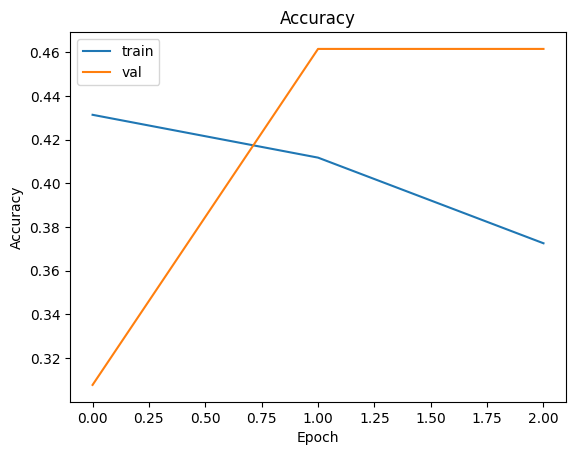

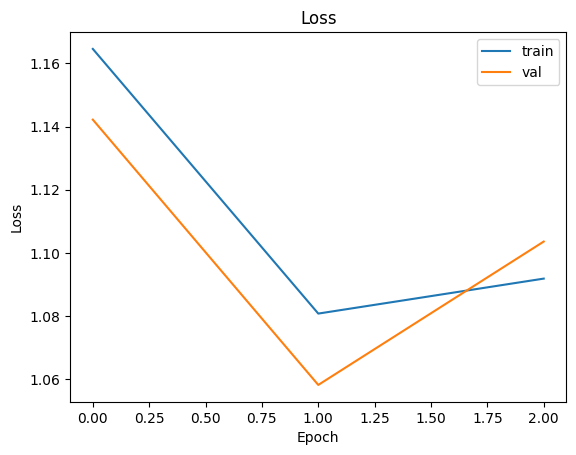

Plots displayed


In [11]:
# Q11. Write a code to plot the accuracy and loss graphs after training a CNN model

#code >
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

def plot_acc_loss_after_training():
    # Simple dummy training to produce a history
    X = np.random.rand(64, 28, 28, 1).astype('float32')
    y = tf.keras.utils.to_categorical(np.random.randint(0, 3, size=(64,)), num_classes=3)
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X, y, epochs=3, batch_size=16, verbose=0, validation_split=0.2)

    # Plot accuracy (separate figure)
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "val"])
    plt.show()

    # Plot loss (separate figure)
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "val"])
    plt.show()
    return "Plots displayed"

# example
print(plot_acc_loss_after_training())


In [12]:
# Q12. Write a code to print the architecture of the ResNet50 model in Keras?

#code >
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

def print_resnet50_summary():
    model = ResNet50(weights=None, include_top=True)
    model.summary()
    return "ResNet50 summary printed"

# example
print(print_resnet50_summary())


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

ResNet50 summary printed


In [13]:
# Q13. Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?

#code >
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def train_basic_cnn_and_log():
    X = np.random.rand(120, 28, 28, 1).astype('float32')
    y = tf.keras.utils.to_categorical(np.random.randint(0, 2, size=(120,)), num_classes=2)

    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    class PrintMetrics(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            print(f"Epoch {epoch+1}: loss={logs.get('loss'):.4f}, acc={logs.get('accuracy'):.4f}")

    history = model.fit(X, y, epochs=3, batch_size=16, verbose=0, callbacks=[PrintMetrics()])
    return "Training complete"

# example
print(train_basic_cnn_and_log())


Epoch 1: loss=0.7000, acc=0.6000
Epoch 2: loss=0.6667, acc=0.6083
Epoch 3: loss=0.6480, acc=0.6000
Training complete
